In [1]:
import sys
sys.path.append('../')

from model import DecisionTree
from rule import RuleExtractor
import matplotlib.pyplot as plt

import os
import numpy as np
import warnings
import pandas as pd

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [2]:
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))

# One vs Rest Decision Tree

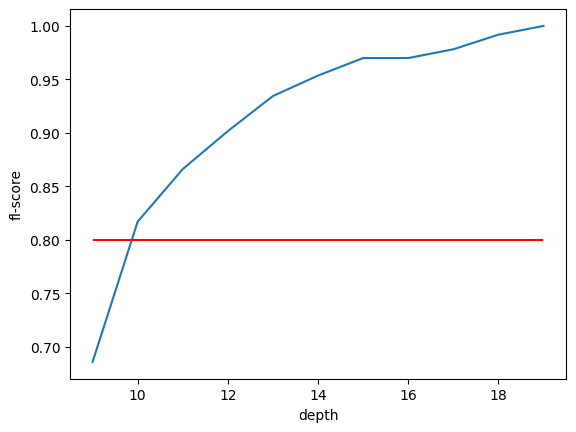

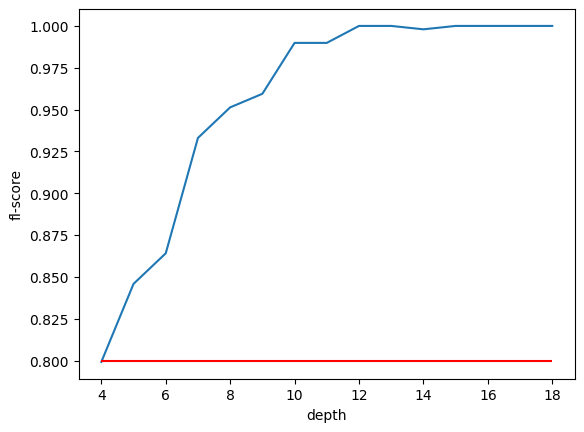

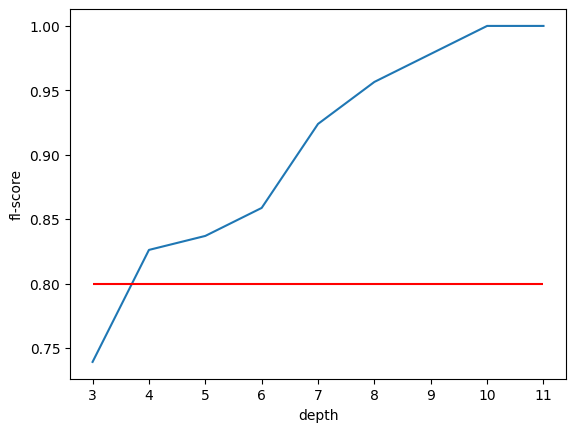

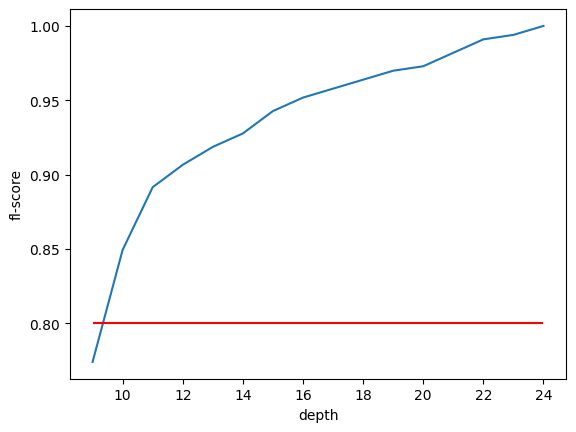

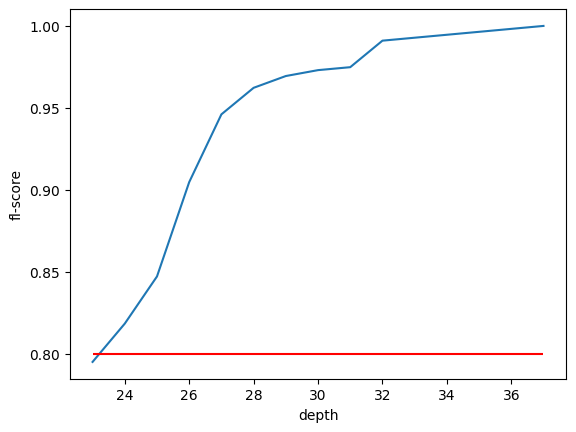

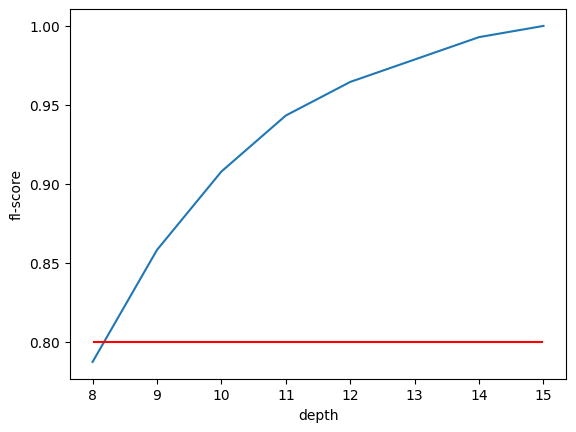

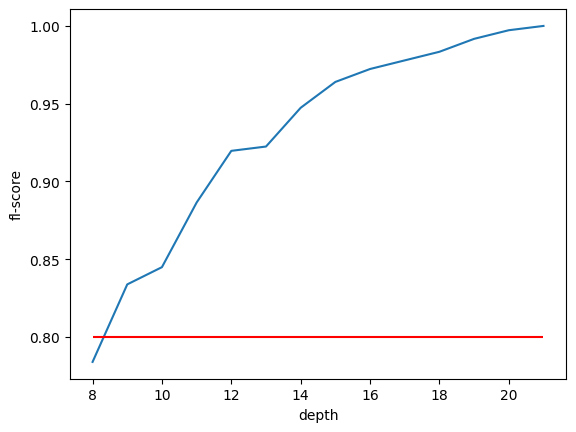

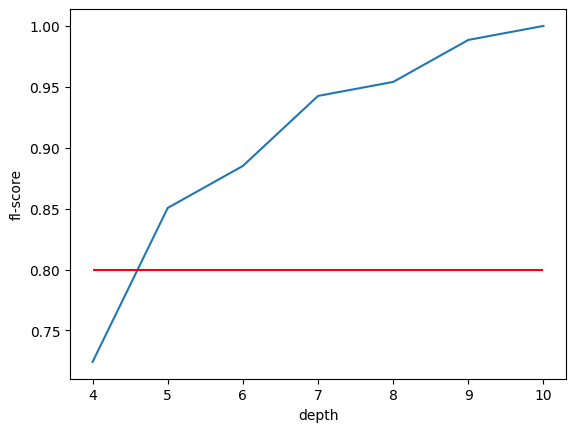

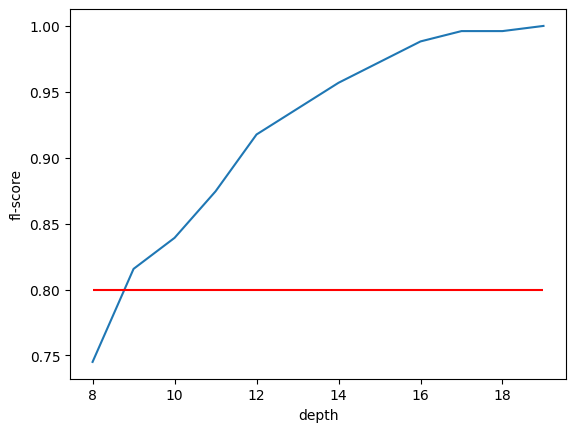

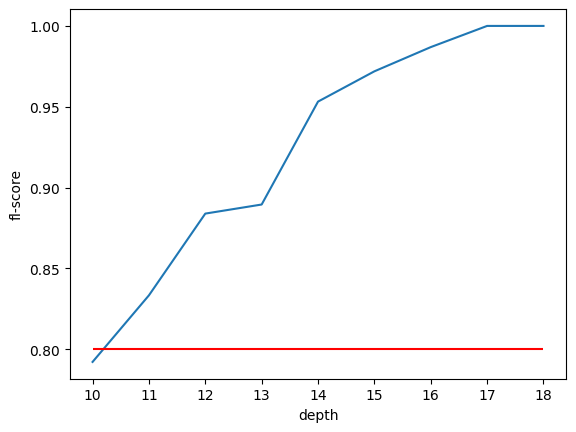

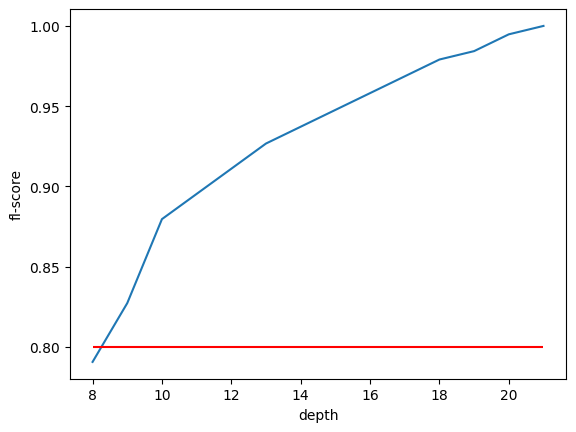

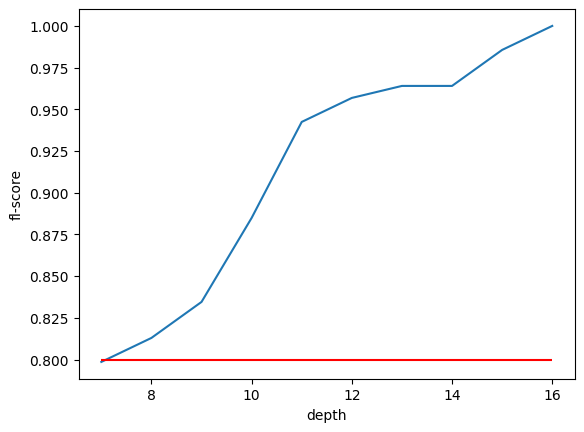

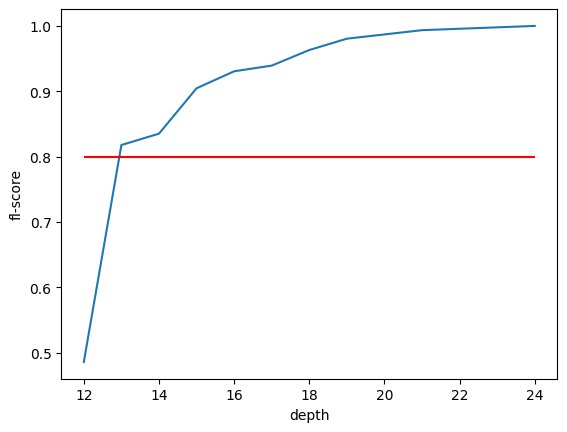

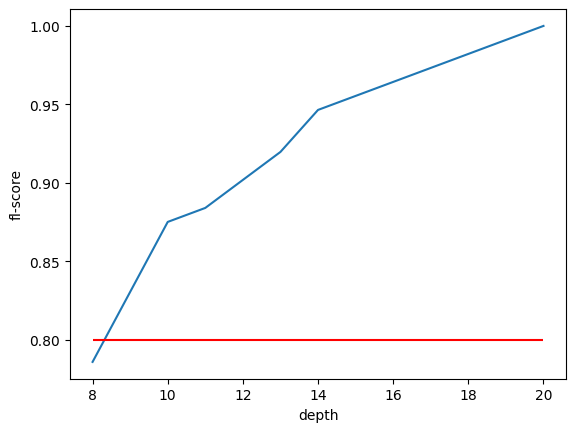

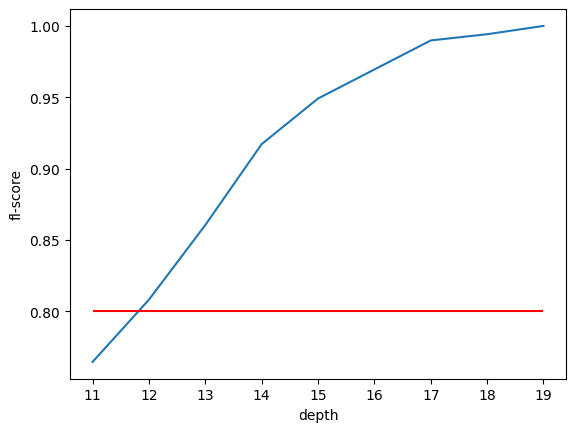

In [4]:
model = DecisionTree(pivot_df, embedding)
k = 15
depth_list = [] 
score_list = []

for i in range(k):
    model.kmeans_target(i)
    max_depth, max_score = model.get_proper_depth(target_score=0.8, scoring='recall')

    rule_extractor = RuleExtractor(model)
    rules = rule_extractor.extract_rule(segment_num=1)
    
    with open(f'../output/{embed_model}_rule/{embed_model}_seg_rule_extract{i}.txt', 'w') as f:
        f.writelines(rules)
    
    depth_list.append(max_depth)
    score_list.append(max_score)

In [5]:
np.min(depth_list), np.max(depth_list), np.mean(depth_list)

(4, 24, 9.8)

In [6]:
line_num_list = []
for i in range(k):
    with open(f'../output/{embed_model}_rule/{embed_model}_seg_rule_extract{i}.txt', 'r') as f:
        line_num = len(set(f.read().replace('[OR]', '[AND]').split('[AND]')))
        line_num_list.append(line_num)
np.min(line_num_list), np.max(line_num_list), np.mean(line_num_list)

FileNotFoundError: [Errno 2] No such file or directory: '../output/srgnn_rule/srgnn_seg_rule_extract0.txt'

# Multi-Class Decision Tree

In [3]:
k=15
model = DecisionTree(pivot_df, embedding)
max_depth, max_score = model.get_proper_depth(target_score=0.6, scoring='')

for i in range(k):
    rule_extractor = RuleExtractor(model)
    rules = rule_extractor.extract_rule(segment_num=i)
    
    with open(f'../output/{embed_model}_rule/{embed_model}_seg_rule_extract{i}.txt', 'w') as f:
        f.writelines(rules)

TypeError: '<' not supported between instances of 'tuple' and 'float'

In [9]:
line_num_list = []
for i in range(k):
    with open(f'../output/{embed_model}_rule/{embed_model}_seg_rule_extract{i}.txt', 'r') as f:
        line_num = len(set(f.read().replace('[OR]', '[AND]').split('[AND]')))
        line_num_list.append(line_num)
np.min(line_num_list), np.max(line_num_list), np.mean(line_num_list)

(36, 160, 85.26666666666667)

In [10]:
line_num_list

[72, 112, 58, 87, 146, 68, 100, 36, 59, 87, 91, 51, 109, 43, 160]